**Librerias**

*Selección e importación:* las librerias seleccionadas e importadas a continuación son las necesarias para realizar un análisis exploratorio del DataFrame "Peliculas".

In [88]:
#Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from scipy import stats
from sklearn.preprocessing import LabelEncoder

**Limpieza, tratamiento y análisis exploratorio de datos**

*Caracterización del DataFrame:* Para realizar la caracterización del DataFrame se determinó cantidad de filas y columnas, nombre de las columnas y tipos de variables.

In [89]:
df = pd.read_csv('Movie_Data_File2.csv')

In [90]:
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,The Fan,NaN,Eckhart Schmidt,"['Désirée Nosbusch', 'Bodo Staiger', 'Simone B...",3.57,NaN,"['Horror', 'Drama']",92.0,['Germany'],German,...,103,402,525,1660,1950,2646,808,714,9042,https://letterboxd.com/film/the-fan-1982/
1,Mad Max: Fury Road,NaN,George Miller,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",4.18,4.5,"['Adventure', 'Science Fiction', 'Action']",121.0,"['Australia', 'USA']",English,...,6139,37471,30112,158356,163753,477901,280815,511140,1682389,https://letterboxd.com/film/mad-max-fury-road/
2,Suspiria,NaN,Dario Argento,"['Jessica Harper', 'Stefania Casini', 'Flavio ...",3.93,4.0,['Horror'],99.0,['Italy'],English,...,2710,11006,14397,53427,70309,138742,60628,88628,443757,https://letterboxd.com/film/suspiria/
3,Lost in Translation,NaN,Sofia Coppola,"['Bill Murray', 'Scarlett Johansson', 'Akiko T...",3.79,4.5,"['Drama', 'Comedy', 'Romance']",102.0,"['UK', 'USA']",English,...,11281,45997,46716,155110,166638,314160,122359,193717,1076949,https://letterboxd.com/film/lost-in-translation/
4,Akira,NaN,Katsuhiro Otomo,"['Mitsuo Iwata', 'Nozomu Sasaki', 'Mami Koyama...",4.28,5.0,"['Animation', 'Action', 'Science Fiction']",124.0,['Japan'],Japanese,...,1663,7286,9544,40850,61104,168485,112657,196532,600721,https://letterboxd.com/film/akira/


In [91]:
#Cantidad de filas y columnas
df.shape

(10002, 29)

In [92]:
#Nombre de las columnas y tipos de variables
df.dtypes

Film_title            object
Release_year         float64
Director              object
Cast                  object
Average_rating       float64
Owner_rating         float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Spoken_languages      object
Description           object
Studios               object
Watches                int64
List_appearances       int64
Likes                  int64
Fans                   int64
½                      int64
★                      int64
★½                     int64
★★                     int64
★★½                    int64
★★★                    int64
★★★½                   int64
★★★★                   int64
★★★★½                  int64
★★★★★                  int64
Total_ratings          int64
Film_URL              object
dtype: object

**Analisis de variables categoricas**

*Cast*

Eliminar datos de la columna Cast, dejando solamente los dos primeros actores

In [93]:
def extraer_dos_actores(cadena):
    if isinstance(cadena, str):
        actores = [actor.strip() for actor in cadena.split(',')]
        return pd.Series(actores[:2]) 
    return pd.Series([None, None]) 

df[['Protagonista', 'Coprotagonista']] = df['Cast'].apply(extraer_dos_actores)
df.drop(columns=['Cast'], inplace=True)


In [94]:
print(df[['Protagonista', 'Coprotagonista']].head())

          Protagonista        Coprotagonista
0  ['Désirée Nosbusch'        'Bodo Staiger'
1         ['Tom Hardy'     'Charlize Theron'
2    ['Jessica Harper'     'Stefania Casini'
3       ['Bill Murray'  'Scarlett Johansson'
4      ['Mitsuo Iwata'       'Nozomu Sasaki'


Observamos que hay Protagonistas repetidos, por lo tanto procederemos a unificarlos

In [95]:
df['Protagonista'] = df['Protagonista'].astype(str)  

df['Protagonista'] = df['Protagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Protagonista'] = df['Protagonista'].str.strip()

df['Protagonista'] = df['Protagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Haremos lo mismo con los coprotagonistas

In [96]:
df['Coprotagonista'] = df['Coprotagonista'].astype(str)  

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"[\[\]']", "", regex=True)

df['Coprotagonista'] = df['Coprotagonista'].str.strip()

df['Coprotagonista'] = df['Coprotagonista'].str.replace(r"\s*,\s*", ", ", regex=True)

Realizamos el conteo

In [97]:
conteo_Protagonista = df['Protagonista'].value_counts()
print(conteo_Protagonista)

Protagonista
None                 57
Mel Blanc            49
Nicolas Cage         36
Sean Connery         33
Johnny Depp          33
                     ..
Madonna               1
Jonathan Lipnicki     1
Martina Gedeck        1
Halina Reijn          1
Olivia Wilde          1
Name: count, Length: 5064, dtype: int64


In [98]:
conteo_Coprotagonista = df['Coprotagonista'].value_counts()
print(conteo_Coprotagonista)

Coprotagonista
nan                 86
None                57
Tommy Lee Jones     14
Robert De Niro      14
Rose Byrne          13
                    ..
Kristen Connolly     1
Josefine Preuß       1
Aylin Tezel          1
Julia Koschitz       1
Allison Williams     1
Name: count, Length: 6284, dtype: int64


*Genres*

Eliminar datos de la columna Genres, dejando solamente el primero

In [99]:
def extraer_primer_genero(cadena):
    if isinstance(cadena, str):
        generos = [g.strip() for g in cadena.split(',')]
        return generos[0] if generos else ''
    return ''
df['Genres'] = df['Genres'].apply(extraer_primer_genero)

In [100]:
print(df[['Genres']].head())

         Genres
0     ['Horror'
1  ['Adventure'
2    ['Horror']
3      ['Drama'
4  ['Animation'


Observamos que hay generos repetidos, por lo tanto procederemos a unificarlos

In [101]:
df['Genres'] = df['Genres'].astype(str)  

df['Genres'] = df['Genres'].str.replace(r"[\[\]']", "", regex=True)

df['Genres'] = df['Genres'].str.strip()

df['Genres'] = df['Genres'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que no hay valores repetidos

In [102]:
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes' '']


Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. (ver cuantas son)

In [103]:
conteo = (df['Genres'] == '').sum()
print(conteo)

24


In [104]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Genres'] = df['Genres'].str.strip()
df = df[df['Genres'] != '']

In [105]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Genres':")
print(df['Genres'].unique())


Valores únicos en la columna 'Genres':
['Horror' 'Adventure' 'Drama' 'Animation' 'Comedy' 'Mystery' 'Documentary'
 'Action' 'Romance' 'Thriller' 'Science Fiction' 'Fantasy' 'Crime'
 'Western' 'History' 'Family' 'War' 'Music' 'TV Movie' 'Epic heroes']


Realizamos el conteo

In [106]:
conteo_Genres = df['Genres'].value_counts()
print(conteo_Genres)

Genres
Drama              2232
Comedy             1423
Horror              867
Thriller            802
Action              734
Crime               529
Romance             504
Science Fiction     443
Adventure           421
Documentary         338
Fantasy             333
Mystery             261
Animation           231
Family              219
History             164
Western             159
War                 129
Music               118
TV Movie             69
Epic heroes           2
Name: count, dtype: int64


*Countries*

Eliminar datos de la columna Countries, dejando solamente el primero

In [107]:
def extraer_primer_pais(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Countries'] = df['Countries'].apply(extraer_primer_pais)


In [108]:
print(df[['Countries']].head())

      Countries
0   ['Germany']
1  ['Australia'
2     ['Italy']
3         ['UK'
4     ['Japan']


In [109]:
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
["['Germany']" "['Australia'" "['Italy']" "['UK'" "['Japan']" "['Germany'"
 "['USA']" "['UK']" "['France'" "['Ireland'" "['USA'" "['Belgium'"
 "['Mexico'" "['Czechoslovakia'" "['Mexico']" "['South Korea'"
 "['France']" "['New Zealand'" "['Italy'" "['Hong Kong']"
 "['South Korea']" "['Canada'" "['Canada']" "['China'" "['USSR']"
 "['Denmark'" "['Japan'" "['Austria']" "['Australia']" "['Sweden']"
 "['Spain']" "['India'" "['Brazil'" "['Sweden'" "['Switzerland'"
 "['Netherlands']" "['Spain'" "['Netherlands'" "['Poland']" "['Czechia'"
 "['Hong Kong'" "['New Zealand']" "['Slovakia'" "['Bulgaria'" "['Hungary'"
 '' "['USSR'" "['Austria'" "['Russia'" "['Iceland'" "['Turkey'"
 "['United Arab Emirates'" "['South Africa'" "['Thailand'" "['Greece']"
 "['Greece'" "['Poland'" "['Norway']" "['Argentina'" "['Indonesia']"
 "['Philippines'" "['Colombia'" "['Czechoslovakia']" "['Russia']"
 "['Indonesia'" "['Ireland']" "['Chile'" "['Turkey']" "['Romania'"
 "['India

Observamos que hay paises repetidos, por lo tanto procederemos a unificarlos

In [110]:
df['Countries'] = df['Countries'].astype(str)  

df['Countries'] = df['Countries'].str.replace(r"[\[\]']", "", regex=True)

df['Countries'] = df['Countries'].str.strip()

df['Countries'] = df['Countries'].str.replace(r"\s*,\s*", ", ", regex=True)

Comprobamos que ya no haya valores repetidos

In [111]:
df['Countries'].unique()

array(['Germany', 'Australia', 'Italy', 'UK', 'Japan', 'USA', 'France',
       'Ireland', 'Belgium', 'Mexico', 'Czechoslovakia', 'South Korea',
       'New Zealand', 'Hong Kong', 'Canada', 'China', 'USSR', 'Denmark',
       'Austria', 'Sweden', 'Spain', 'India', 'Brazil', 'Switzerland',
       'Netherlands', 'Poland', 'Czechia', 'Slovakia', 'Bulgaria',
       'Hungary', '', 'Russia', 'Iceland', 'Turkey',
       'United Arab Emirates', 'South Africa', 'Thailand', 'Greece',
       'Norway', 'Argentina', 'Indonesia', 'Philippines', 'Colombia',
       'Chile', 'Romania', 'Singapore', 'Israel', 'Cross Country',
       'Ukraine', 'Dominican Republic', 'Libya', 'Iraq', 'Bolivia',
       'Lithuania', 'Malaysia', 'Finland', 'Luxembourg', 'Taiwan',
       'Syrian Arab Republic', 'Ivory Coast', 'Country Club', 'Bahamas',
       'Cuba', 'Jamaica', 'Iran', 'Bosnia and Herzegovina',
       'Burkina Faso', 'Nepal', 'Serbia', 'Portugal', 'Aruba', 'Ecuador',
       'Panama', 'Estonia', 'Uganda', 'Jorda

Si bien no hay valores repetidos, observamos que una de las categorias es ' ' y procederemos a eliminar a las filas que la contenga. (ver cuantos son)

Primero veremos cuantas filas contienen ' '

In [112]:
conteo = (df['Countries'] == '').sum()
print(conteo)

105


In [113]:
#Eliminamos los espacios en blanco al principio y al final de cada cadena.
df['Countries'] = df['Countries'].str.strip()
df = df[df['Countries'] != '']

In [114]:
#Comprobamos la eliminación
print("\nValores únicos en la columna 'Countries':")
print(df['Countries'].unique())


Valores únicos en la columna 'Countries':
['Germany' 'Australia' 'Italy' 'UK' 'Japan' 'USA' 'France' 'Ireland'
 'Belgium' 'Mexico' 'Czechoslovakia' 'South Korea' 'New Zealand'
 'Hong Kong' 'Canada' 'China' 'USSR' 'Denmark' 'Austria' 'Sweden' 'Spain'
 'India' 'Brazil' 'Switzerland' 'Netherlands' 'Poland' 'Czechia'
 'Slovakia' 'Bulgaria' 'Hungary' 'Russia' 'Iceland' 'Turkey'
 'United Arab Emirates' 'South Africa' 'Thailand' 'Greece' 'Norway'
 'Argentina' 'Indonesia' 'Philippines' 'Colombia' 'Chile' 'Romania'
 'Singapore' 'Israel' 'Cross Country' 'Ukraine' 'Dominican Republic'
 'Libya' 'Iraq' 'Bolivia' 'Lithuania' 'Malaysia' 'Finland' 'Luxembourg'
 'Taiwan' 'Syrian Arab Republic' 'Ivory Coast' 'Country Club' 'Bahamas'
 'Cuba' 'Jamaica' 'Iran' 'Bosnia and Herzegovina' 'Burkina Faso' 'Nepal'
 'Serbia' 'Portugal' 'Aruba' 'Ecuador' 'Panama' 'Estonia' 'Uganda'
 'Jordan' 'Pakistan' 'Nigeria' 'Yugoslavia' 'Malawi' 'Ghana' 'Lebanon'
 'Peru' 'Albania' 'Egypt' 'Netherlands Antilles' 'Mongolia' 'Be

Realizamos el conteo

In [115]:
conteo_Countries = df['Countries'].value_counts()
print(conteo_Countries)

Countries
USA                                  5636
UK                                    863
France                                525
Italy                                 373
Canada                                354
                                     ... 
Netherlands Antilles                    1
Mongolia                                1
Benin                                   1
"Lao Peoples Democratic Republic"       1
Morocco                                 1
Name: count, Length: 90, dtype: int64


*Studios*

Eliminar datos de la columna Studios, dejando solamente el primero

In [116]:
def extraer_primer_productor(cadena):
    if isinstance(cadena, str):
        productor = [g.strip() for g in cadena.split(',')]
        return productor [0] if productor else ''
    return ''
df['Studios'] = df['Studios'].apply(extraer_primer_productor)

In [117]:
print(df[['Studios']].head())

                       Studios
0  ['Barbara Moorse Workshop']
1     ['Warner Bros. Pictures'
2          ['Seda Spettacoli']
3         ['American Zoetrope'
4                       ['MBS'


Eliminamos los Studios repetidos y verificamos que se hayan realizado los cambios con exito.

In [118]:
df['Studios'] = df['Studios'].astype(str)  

df['Studios'] = df['Studios'].str.replace(r"[\[\]']", "", regex=True)

df['Studios'] = df['Studios'].str.strip()

df['Studios'] = df['Studios'].str.replace(r"\s*,\s*", ", ", regex=True)

In [119]:
conteo_Studios = df['Studios'].value_counts()
print(conteo_Studios)

Studios
Paramount Pictures           303
Universal Pictures           249
                             222
Columbia Pictures            217
Warner Bros. Pictures        203
                            ... 
Futura Films                   1
C.A.P.A.C.                     1
Carlton Film Export            1
Films Jean Alexandre           1
Testa Gay Cinematografica      1
Name: count, Length: 4522, dtype: int64


*Director*

Eliminar datos de la columna Director, dejando solamente el primero

In [120]:
def extraer_primer_director(cadena):
    if isinstance(cadena, str):
        pais = [g.strip() for g in cadena.split(',')]
        return pais [0] if pais else ''
    return ''
df['Director'] = df['Director'].apply(extraer_primer_pais)

In [121]:
conteo_directores = df['Director'].value_counts()
print(conteo_directores)

Director
Chuck Jones           54
Cirio H. Santiago     41
Antonio Margheriti    39
William Witney        33
Steven Spielberg      31
                      ..
Yuval Adler            1
Ali Selim              1
Jean Negulesco         1
Clement Virgo          1
Kazuo Komizu           1
Name: count, Length: 4473, dtype: int64


**Columnas**

*Eliminación de columnas según objetivos*

In [122]:
#Eliminación de columnas: Release_year por tener totalidad de datos faltantes y el resto de la columnas por no contener información necesaria para nuestro análisis
df = df.drop(columns=['Release_year', 'Owner_rating' , 'Spoken_languages', 'List_appearances', 'Fans', '½' , '★' , '★½' , '★★' , '★★½' , '★★★' , '★★★½' , '★★★★' , '★★★★½' , '★★★★★'])

In [123]:
#Comprobamos la eliminación de las columnas no deseadas
df.shape
df.dtypes

Film_title            object
Director              object
Average_rating       float64
Genres                object
Runtime              float64
Countries             object
Original_language     object
Description           object
Studios               object
Watches                int64
Likes                  int64
Total_ratings          int64
Film_URL              object
Protagonista          object
Coprotagonista        object
dtype: object

*Traducción del nombre de las columnas*

In [124]:
#Cambio del nombre de las columnas 
df = df.rename(columns={'Film_title' : 'Titulo' , 'Average_rating' : 'Calificación_promedio', 'Genres' : 'Genero', 'Runtime' : 'Duración' , 'Countries' : 'Pais' , 'Original_language' : 'Lenguaje' , 'Description' : 'Descripcion', 'Studios' : 'Productora' , 'Watches' : 'Vistas', 'Total_ratings': 'Ratings' , 'Film_URL' : 'Enlace'})
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas', 'Likes',
       'Ratings', 'Enlace', 'Protagonista', 'Coprotagonista'],
      dtype='object')


**Valores faltantes**

*Identificacion de valores faltantes y manejo* 

In [125]:
#Identificación de valores faltantes
df.isnull().sum()

Titulo                     0
Director                   0
Calificación_promedio    522
Genero                     0
Duración                   8
Pais                       0
Lenguaje                   0
Descripcion                2
Productora                 0
Vistas                     0
Likes                      0
Ratings                    0
Enlace                     0
Protagonista               0
Coprotagonista             0
dtype: int64

Obtenemos % de datos faltantes numericos para definir el manejo de los mismos

In [126]:
masnan = df.isnull().sum().max()
filas_total= len(df)
resultado1 = (masnan / filas_total) * 100
print(f"El porcentaje máximo de valores nulos por columna es igual a {resultado1:.2f} %")

El porcentaje máximo de valores nulos por columna es igual a 5.29 %


La falta de datos numéricos es aleatoria y por lo tanto los manejaremos a través de la *Imputación Simple* utilizando la media, ya que con la *Eliminación de filas* perderíamos infrmación importante contenida en el resto de las columnas de la misma fila. Por otra parte, al ser bajo el % de datos faltantes respecto a la totalidad, la Imputación no cambiara la distribución de nuestros datos.

In [127]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Calificación_promedio']=imp.fit_transform(df[['Calificación_promedio']])

In [128]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer(strategy='mean')
df['Duración']=imp.fit_transform(df[['Duración']])

In [129]:
#Compruebo que la imputación de los datos numéricos se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripcion              2
Productora               0
Vistas                   0
Likes                    0
Ratings                  0
Enlace                   0
Protagonista             0
Coprotagonista           0
dtype: int64

Eliminación de filas con datos faltantes categóricos

In [130]:
df = df.dropna(subset=['Descripcion' , 'Coprotagonista'], axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9871 entries, 0 to 10001
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Titulo                 9871 non-null   object 
 1   Director               9871 non-null   object 
 2   Calificación_promedio  9871 non-null   float64
 3   Genero                 9871 non-null   object 
 4   Duración               9871 non-null   float64
 5   Pais                   9871 non-null   object 
 6   Lenguaje               9871 non-null   object 
 7   Descripcion            9871 non-null   object 
 8   Productora             9871 non-null   object 
 9   Vistas                 9871 non-null   int64  
 10  Likes                  9871 non-null   int64  
 11  Ratings                9871 non-null   int64  
 12  Enlace                 9871 non-null   object 
 13  Protagonista           9871 non-null   object 
 14  Coprotagonista         9871 non-null   object 
dtypes: float

In [131]:
#Compruebo que la eliminacion de filas con datos faltantes se realizó con exito
df.isnull().sum()

Titulo                   0
Director                 0
Calificación_promedio    0
Genero                   0
Duración                 0
Pais                     0
Lenguaje                 0
Descripcion              0
Productora               0
Vistas                   0
Likes                    0
Ratings                  0
Enlace                   0
Protagonista             0
Coprotagonista           0
dtype: int64

**Outliers**

*Identificacion de Outliers y manejo*

Identificamos que variables contienen valores numericos

In [132]:
print(df.select_dtypes(include=['number']).columns)

Index(['Calificación_promedio', 'Duración', 'Vistas', 'Likes', 'Ratings'], dtype='object')


Visualización de distribución y valores extremos para luego seleccionar la estrategia de manejo.

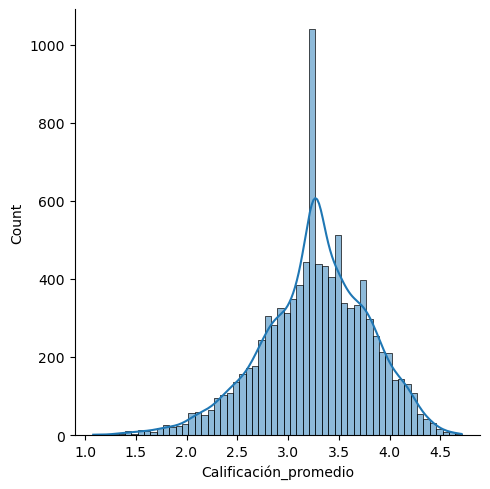

In [133]:
sns.displot(df['Calificación_promedio'], kde=True) 
sns.despine() 

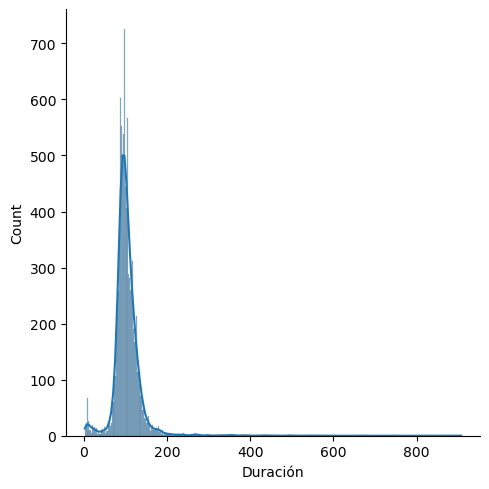

In [134]:
sns.displot(df['Duración'], kde=True) 
sns.despine() 

Debido a que las variables Calificación promedio y Duración presentan distribución normal utilizaremos zscore para detectar outliers

*Calificación_promedio*

In [135]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Calificación_promedio'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Calificación_promedio', 'zscore']])

Cantidad de outliers encontrados: 54
      Calificación_promedio    zscore
157                    1.49 -3.370698
650                    1.57 -3.219093
1050                   1.66 -3.048536
1100                   1.65 -3.067487
1172                   1.68 -3.010635
1705                   1.35 -3.636009
1827                   1.43 -3.484403
1993                   1.56 -3.238043
2506                   1.28 -3.768664
2575                   1.49 -3.370698
2935                   1.53 -3.294896
3215                   1.63 -3.105388
3220                   1.11 -4.090826
3221                   1.40 -3.541255
3222                   1.54 -3.275945
3223                   1.57 -3.219093
3227                   1.62 -3.124339
3812                   1.34 -3.654959
4176                   1.24 -3.844467
4178                   1.29 -3.749713
4333                   1.60 -3.162240
4366                   1.44 -3.465452
4367                   1.68 -3.010635
4531                   1.52 -3.313846
4652         

In [136]:
print("Valor mínimo:", df['Calificación_promedio'].min())
print("Valor máximo:", df['Calificación_promedio'].max())

Valor mínimo: 1.08
Valor máximo: 4.71


La calificación promedio tiene un rango de 1 a 5 por lo tanto los valores que estadisticamente son identificados como outliers, son calificaciones promedio bajas pero se encuntran dentro del rango que podria recibir una pelicula, por lo tanto dichos valores seran conservados.

*Duración*

In [137]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 105
      Duración     zscore
12       228.0   3.297172
145      233.0   3.429602
369      467.0   9.627332
717      379.0   7.296562
889      316.0   5.627942
...        ...        ...
9908     600.0  13.149973
9909     300.0   5.204166
9916     585.0  12.752683
9994     344.0   6.369551
9996     270.0   4.409585

[105 rows x 2 columns]


Hacemos un top 10 de las peliculas con mayor duracion para ver a que se tratan los valores fuera de rango.

In [138]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
9166                    I, Claudius              Herbert Wise   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Cuando analizamos los ouliers de duración observamos que los valores mas altos son series y no son objeto de nuestro estudio, por lo tanto buscaremos palabras claves dentro del titulo y la descripción que nos indiquen cuantas hay.

In [139]:
keywords = ['season', 'episode', 'series', 'part']

def check_series(row):
    Titulo = str(row['Titulo']).lower() if pd.notna(row['Titulo']) else ''
    Descripcion = str(row['Descripcion']).lower() if pd.notna(row['Descripcion']) else ''
    text = Titulo + Descripcion  
    return any(keyword in text for keyword in keywords)

df['is_series'] = df.apply(check_series, axis=1)
print(df['is_series'].sum())

1077


Eliminamos las series 

In [140]:
df = df[~df['is_series']]

Volvemos a realizar el analisis de los outliers

In [141]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Duración'])

outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Duración', 'zscore']])

Cantidad de outliers encontrados: 88
      Duración     zscore
12       228.0   3.398041
145      233.0   3.534422
369      467.0   9.917053
717      379.0   7.516747
889      316.0   5.798346
...        ...        ...
9835     326.0   6.071108
9908     600.0  13.544787
9909     300.0   5.361927
9916     585.0  13.135644
9994     344.0   6.562080

[88 rows x 2 columns]


In [142]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                             Titulo                  Director  \
8827          Berlin Alexanderplatz  Rainer Werner Fassbinder   
3082                          Out 1           Jacques Rivette   
7517                Big Little Lies          Jean-Marc Vallée   
4376           Brideshead Revisited         Charles Sturridge   
9908                     Your Honor             Edward Berger   
9916       The Underground Railroad             Barry Jenkins   
1821                          Shoah           Claude Lanzmann   
7542  Tie Xi Qu: West of the Tracks                 Wang Bing   
6193                  Into the West           Robert Dornhelm   
8689                      The Stand                Josh Boone   

      Calificación_promedio       Genero  Duración     Pais Lenguaje  \
8827                   4.23        Crime     907.0  Germany   German   
3082                   4.06      Mystery     743.0   France   French   
7517                   4.33        Drama     702.0      USA  English

Observamos que no se eliminaron todos los outliers y que seguimos teniendo series en nuestra lista, por lo tanto pondremos un limite de 210 minutos (3,5 horas).

In [143]:
df = df[df['Duración'] <= 210.0]

# Mostrar cantidad de filas antes y después
print("Filas originales:", len(df))
print("Filas después del filtrado:", len(df))

Filas originales: 8704
Filas después del filtrado: 8704


In [144]:
top10 = df.sort_values(by='Duración', ascending=False).head(10)
print(top10)

                       Titulo                  Director  \
8826            Mrs. Fletcher         Nicole Holofcener   
7530             The Irishman           Martin Scorsese   
2691            War and Peace                King Vidor   
1842            Seven Samurai            Akira Kurosawa   
5414               Shackleton         Charles Sturridge   
2986  The Fighting Devil Dogs              John English   
5526          World on a Wire  Rainer Werner Fassbinder   
3071            Boccaccio '70          Vittorio De Sica   
1319                Malcolm X                 Spike Lee   
1335                    Giant            George Stevens   

      Calificación_promedio           Genero  Duración       Pais  Lenguaje  \
8826               3.600000            Drama     210.0        USA   English   
7530               3.910000          History     209.0        USA   English   
2691               3.350000            Drama     208.0      Italy   English   
1842               4.610000       

Observamos que el filtro se aplicó con exito

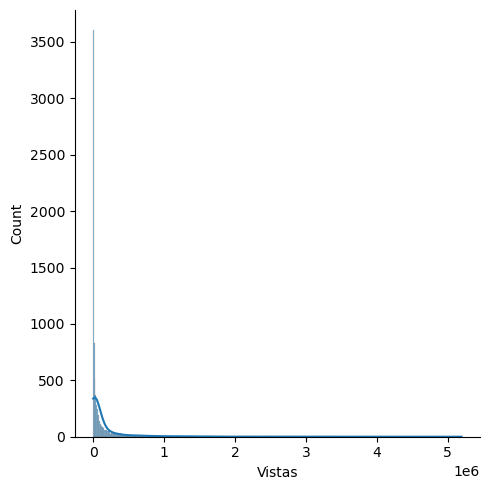

In [145]:
sns.displot(df['Vistas'], kde=True) 
sns.despine() 

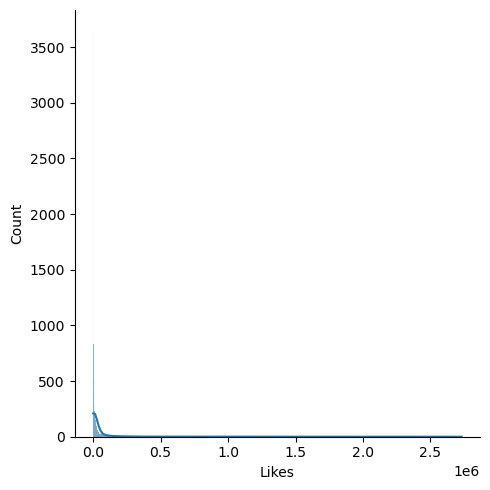

In [146]:
sns.displot(df['Likes'], kde=True) 
sns.despine() 

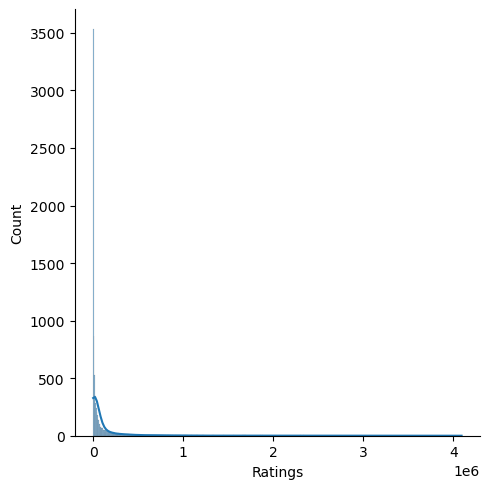

In [147]:
sns.displot(df['Ratings'], kde=True) 
sns.despine() 

La columna Vistas, Likes y Ratings presentan sesgo por lo tanto utilizaremos el metodo de rango intercuartilico para detectar outliers

*Vistas*

In [148]:
Q1 = df['Vistas'].quantile(0.25)
Q3 = df['Vistas'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Vistas'] < limite_inferior) | (df['Vistas'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Vistas']])

Cantidad de outliers encontrados: 1254
       Vistas
1     2488721
3     1596190
4      873068
6      283873
7     3014320
...       ...
9933   367484
9934   304029
9967   328284
9968   697663
9978   889283

[1254 rows x 1 columns]


In [149]:
top10 = df.sort_values(by='Vistas', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
265                          Fight Club      David Fincher   
243                        Interstellar  Christopher Nolan   
7554                           Parasite       Bong Joon Ho   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
18                      The Truman Show         Peter Weir   
862                           Inception  Christopher Nolan   
1232                        Ratatouille          Brad Bird   
634                        Forrest Gump    Robert Zemeckis   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
265                    4.27            Drama     139.0      Germany  English   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los valores mas altos de Vistas vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esas visitas. Analizamos las 10 peliculas mas vistas y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Likes*

In [150]:
Q1 = df['Likes'].quantile(0.25)
Q3 = df['Likes'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Likes'] < limite_inferior) | (df['Likes'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Likes']])

Cantidad de outliers encontrados: 1327
        Likes
1      927538
3      493248
4      341567
6       85788
7     1057816
...       ...
9933    99490
9934    95814
9967    90910
9968   222612
9978   288113

[1327 rows x 1 columns]


In [151]:
top10 = df.sort_values(by='Likes', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9826                             Barbie       Greta Gerwig   
7552                              Joker      Todd Phillips   
9126  Everything Everywhere All at Once   Daniel Scheinert   
21                             Whiplash    Damien Chazelle   
18                      The Truman Show         Peter Weir   
80                        Spirited Away     Hayao Miyazaki   

      Calificación_promedio           Genero  Duración         Pais  Lenguaje  \
7554                   4.55           Comedy     133.0  South Korea    Korean   
243                    4.41  Science Fiction     169.0           UK   English   
265                    4.27            Drama     139.0      Germany   Engl

Al igual que con la variable Vistas, cuando analizamos los valores mas altos de Likes vemos que no se trata de errores en los registros, ya que hay peliculas que realmente recibieron esa cantidad de Likes. Analizamos las 10 peliculas con mas Likes y observamos que son peliculas que fueron exitosas en los ultimos tiempos, por lo tanto conservaremos esos valores.

*Ratings*

In [152]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Ratings'] < limite_inferior) | (df['Ratings'] > limite_superior)]
print("Cantidad de outliers encontrados:", len(outliers))
print(outliers[['Ratings']])

Cantidad de outliers encontrados: 1243
      Ratings
1     1682389
3     1076949
4      600721
6      183927
7     1780203
...       ...
9933   316501
9934   262071
9967   243736
9968   633397
9978   782412

[1243 rows x 1 columns]


In [153]:
top10 = df.sort_values(by='Ratings', ascending=False).head(10)
print(top10)

                                 Titulo           Director  \
9826                             Barbie       Greta Gerwig   
7554                           Parasite       Bong Joon Ho   
243                        Interstellar  Christopher Nolan   
265                          Fight Club      David Fincher   
7552                              Joker      Todd Phillips   
9817  Spider-Man: Into the Spider-Verse    Bob Persichetti   
9126  Everything Everywhere All at Once   Daniel Scheinert   
9825                        Oppenheimer  Christopher Nolan   
8943                               Dune   Denis Villeneuve   
21                             Whiplash    Damien Chazelle   

      Calificación_promedio           Genero  Duración         Pais Lenguaje  \
9826                   3.78           Comedy     114.0           UK  English   
7554                   4.55           Comedy     133.0  South Korea   Korean   
243                    4.41  Science Fiction     169.0           UK  English 

Cuando analizamos los outliers de la variable Ratings observamos que son las mismas peliculas que aparecieron con mas Vistas y Likes, por lo tanto también se conservaran estos valores 

**Objetivo específico 1:** analizar la aceptación de películas por protagonista, director, genero y país de origen según calificación_promedio.

Para visualizar el objetivo agruparemos el DataFrame por variable y calcularemos el promedio de Calificación_promedio para cada una.
Luego ordenaremos de mayor a menor y seleccionaremos los 10 primeros. Lo observaremos de forma gráfica y analítica.

In [164]:
top_protagonistas = (
    df.groupby('Protagonista')['Calificación_promedio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\767727543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


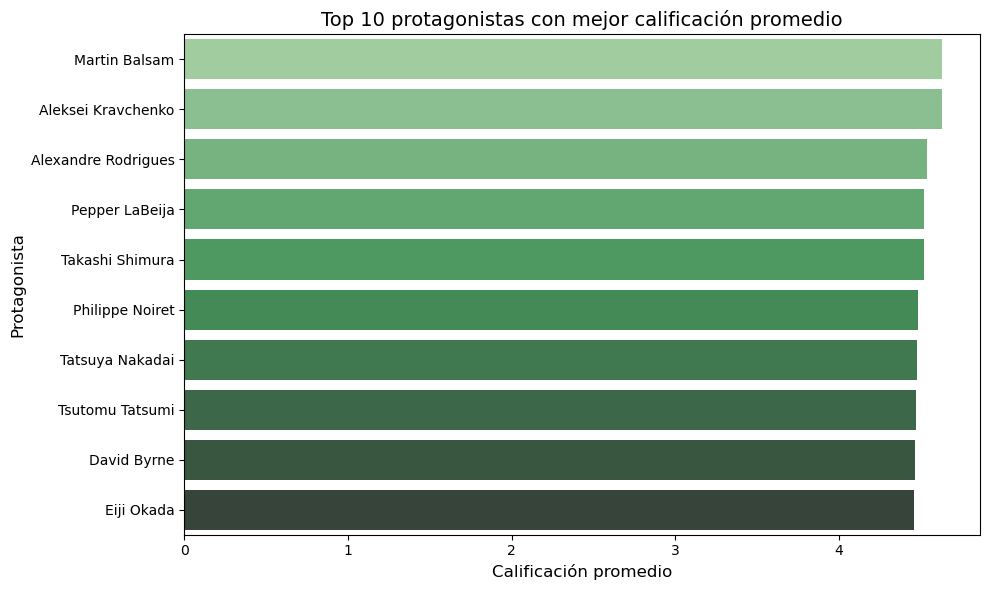

In [165]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_protagonistas,
    x='Calificación_promedio',
    y='Protagonista',
    palette='Greens_d'
)

plt.title('Top 10 protagonistas con mejor calificación promedio', fontsize=14)
plt.xlabel('Calificación promedio', fontsize=12)
plt.ylabel('Protagonista', fontsize=12)
plt.tight_layout()
plt.show()

In [176]:
print(top_protagonistas)

          Protagonista  Calificación_promedio
0        Martin Balsam               4.630000
1   Aleksei Kravchenko               4.630000
2  Alexandre Rodrigues               4.540000
3       Pepper LaBeija               4.520000
4      Takashi Shimura               4.520000
5      Philippe Noiret               4.480000
6      Tatsuya Nakadai               4.476667
7      Tsutomu Tatsumi               4.470000
8          David Byrne               4.465000
9           Eiji Okada               4.460000


In [166]:
top_directores = (
    df.groupby('Director')['Calificación_promedio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\3889191983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


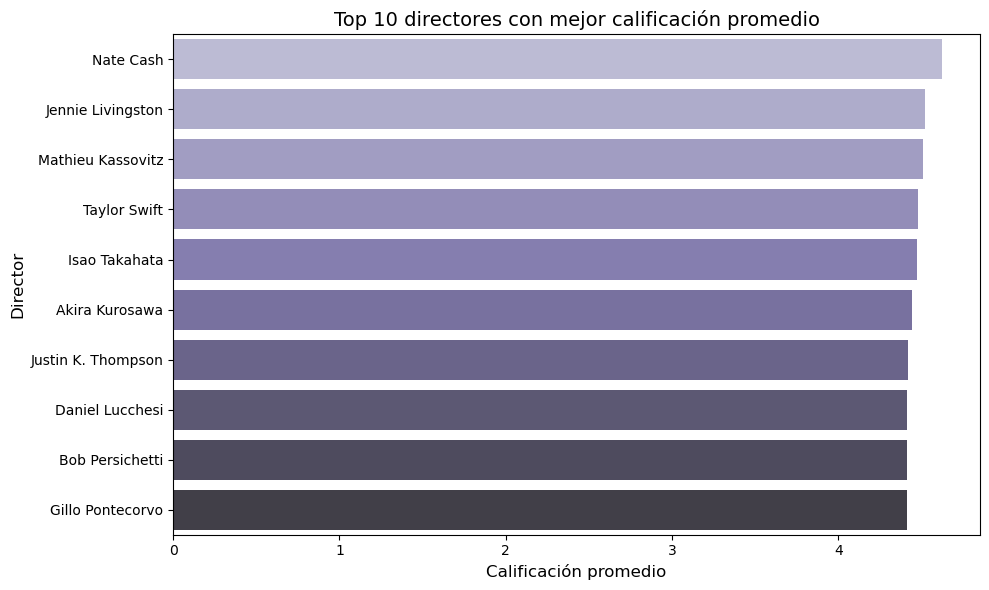

In [167]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_directores,
    x='Calificación_promedio',
    y='Director',
    palette='Purples_d'
)

plt.title('Top 10 directores con mejor calificación promedio', fontsize=14)
plt.xlabel('Calificación promedio', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

In [175]:
print(top_directores)

             Director  Calificación_promedio
0           Nate Cash                  4.620
1   Jennie Livingston                  4.520
2   Mathieu Kassovitz                  4.510
3        Taylor Swift                  4.480
4       Isao Takahata                  4.470
5      Akira Kurosawa                  4.445
6  Justin K. Thompson                  4.420
7     Daniel Lucchesi                  4.410
8     Bob Persichetti                  4.410
9    Gillo Pontecorvo                  4.410


In [168]:
top_generos = (
    df.groupby('Genero')['Calificación_promedio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\2773087620.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


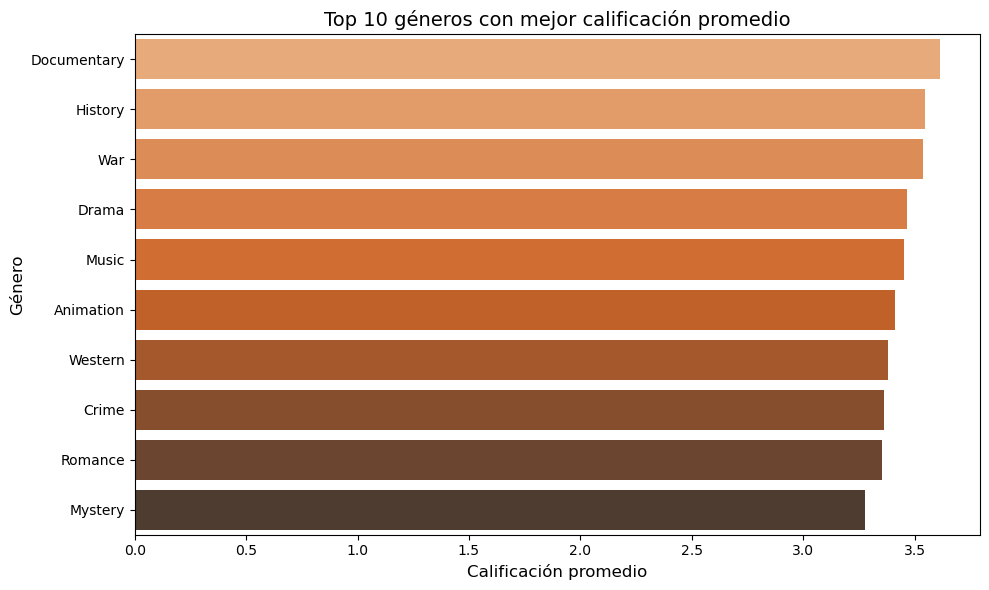

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_generos,
    x='Calificación_promedio',
    y='Genero',
    palette='Oranges_d'
)

plt.title('Top 10 géneros con mejor calificación promedio', fontsize=14)
plt.xlabel('Calificación promedio', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()
plt.show()

In [174]:
print(top_generos)

        Genero  Calificación_promedio
0  Documentary               3.612777
1      History               3.544829
2          War               3.538972
3        Drama               3.463804
4        Music               3.454133
5    Animation               3.411291
6      Western               3.381072
7        Crime               3.360671
8      Romance               3.352369
9      Mystery               3.277728


In [170]:
# Agrupar por país y calcular promedio
top_paises = (
    df.groupby('Pais')['Calificación_promedio']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\3536238509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


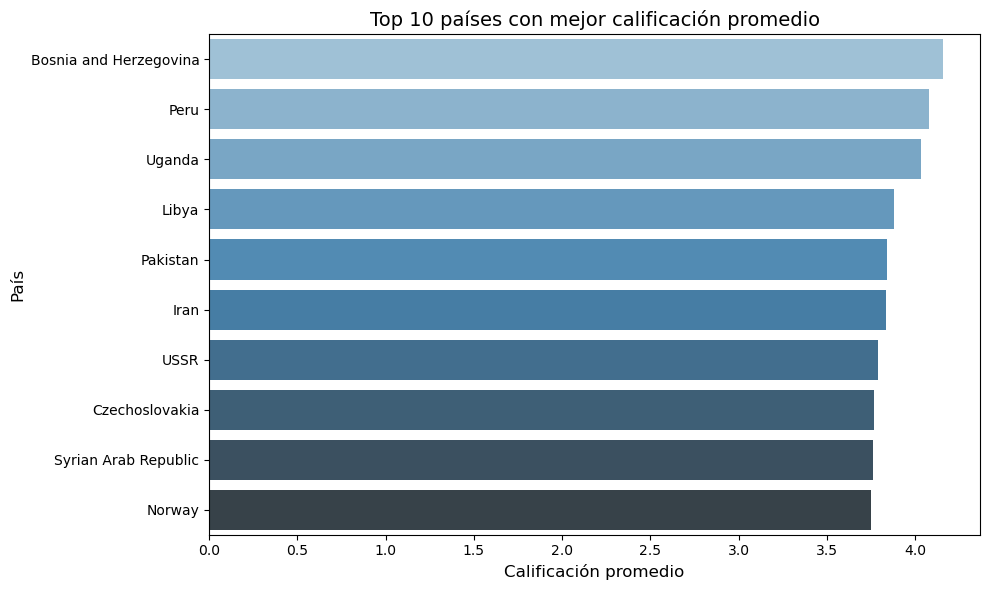

In [171]:
# Configurar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_paises,
    x='Calificación_promedio',
    y='Pais',
    palette='Blues_d'
)

# Títulos y etiquetas
plt.title('Top 10 países con mejor calificación promedio', fontsize=14)
plt.xlabel('Calificación promedio', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()

In [173]:
print(top_paises)

                     Pais  Calificación_promedio
0  Bosnia and Herzegovina               4.160000
1                    Peru               4.080000
2                  Uganda               4.035000
3                   Libya               3.880000
4                Pakistan               3.840000
5                    Iran               3.836667
6                    USSR               3.790333
7          Czechoslovakia               3.767778
8    Syrian Arab Republic               3.760000
9                  Norway               3.748333


*¿Que pasaría si este mismo analisis lo realizamos con la relación de likes sobre vistas?*

Creamos una nueva columna que se llamará Porcentaje_likes

In [178]:
df['Porcentaje_likes'] = (df['Likes'] / df['Vistas'])*100
print(df.columns)

Index(['Titulo', 'Director', 'Calificación_promedio', 'Genero', 'Duración',
       'Pais', 'Lenguaje', 'Descripcion', 'Productora', 'Vistas', 'Likes',
       'Ratings', 'Enlace', 'Protagonista', 'Coprotagonista', 'zscore',
       'is_series', 'Porcentaje_likes'],
      dtype='object')


Observamos el rango de valores de la nueva columna

In [179]:
print("Valor mínimo:", df['Porcentaje_likes'].min())
print("Valor máximo:", df['Porcentaje_likes'].max())

Valor mínimo: 0.0
Valor máximo: 55.55555555555556


In [180]:
top_protagonistas_likes = (
    df.groupby('Protagonista')['Porcentaje_likes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\3324692458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


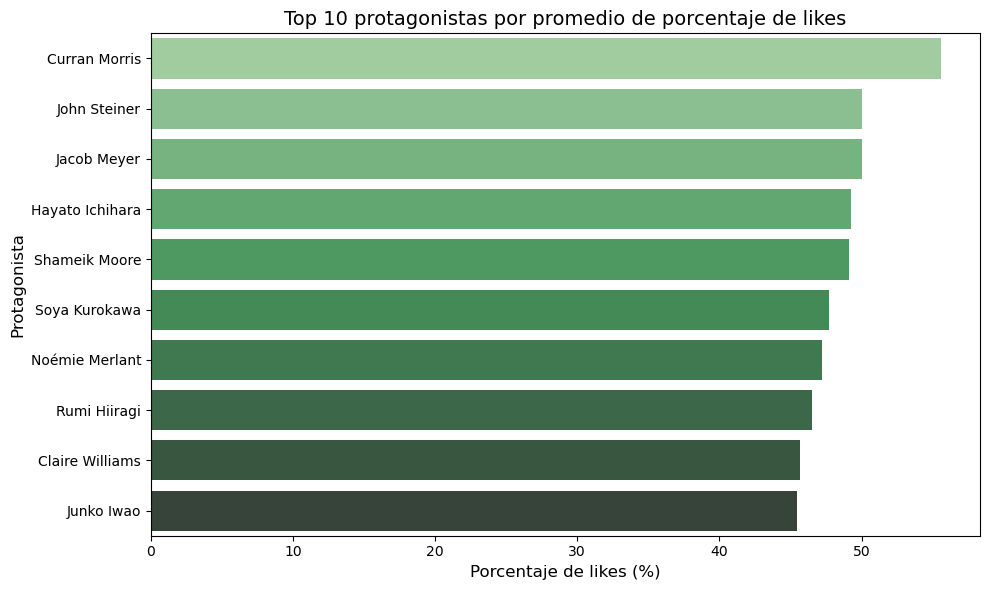

In [181]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_protagonistas_likes,
    x='Porcentaje_likes',
    y='Protagonista',
    palette='Greens_d'
)

plt.title('Top 10 protagonistas por promedio de porcentaje de likes', fontsize=14)
plt.xlabel('Porcentaje de likes (%)', fontsize=12)
plt.ylabel('Protagonista', fontsize=12)
plt.tight_layout()
plt.show()

In [182]:
top_directores_likes = (
    df.groupby('Director')['Porcentaje_likes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\1229394609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


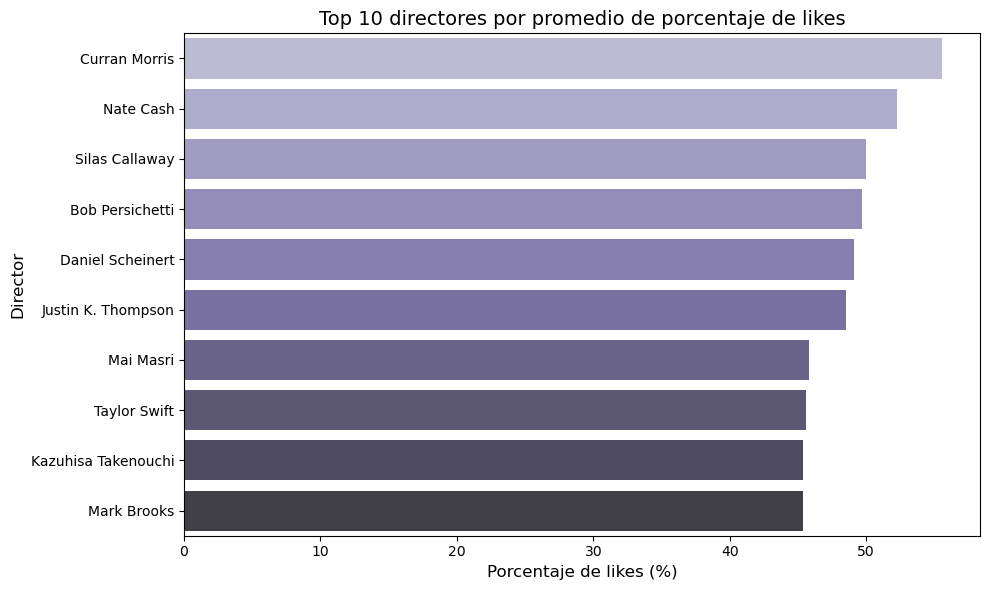

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_directores_likes,
    x='Porcentaje_likes',
    y='Director',
    palette='Purples_d'
)

plt.title('Top 10 directores por promedio de porcentaje de likes', fontsize=14)
plt.xlabel('Porcentaje de likes (%)', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.show()

Analizamos el actor y director con mayor porcentaje, ya que es un nombre que no parecia en el top 10 analizando las variables por separado.

In [184]:
df_str = df.astype(str).apply(lambda x: x.str.lower())
filtro = df_str.apply(lambda row: row.str.contains('curran morris')).any(axis=1)
filas_con_curran_morris = df[filtro]
print(filas_con_curran_morris)

                 Titulo       Director  Calificación_promedio  Genero  \
9641  Soldiers & Saints  Curran Morris               3.268664  Action   

      Duración Pais Lenguaje  \
9641      45.0  USA  English   

                                            Descripcion  \
9641  Still reeling from Codey’s death, the C.A.M.F....   

                  Productora  Vistas  Likes  Ratings  \
9641  Curranator Productions       9      5        4   

                                            Enlace   Protagonista  \
9641  https://letterboxd.com/film/soldiers-saints/  Curran Morris   

     Coprotagonista    zscore  is_series  Porcentaje_likes  
9641     AJ Talbert -1.593504      False         55.555556  


Cuando evaluamos protagonista y director segun el porcentaje de likes observamos que aparecen diferentes resultados, quiza estos se encuntren más asociados a un modelo para realizar una recomendacion que las variables Vistas y Likes en valores absolutos.

In [185]:
top_generos_likes = (
    df.groupby('Genero')['Porcentaje_likes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\881196298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


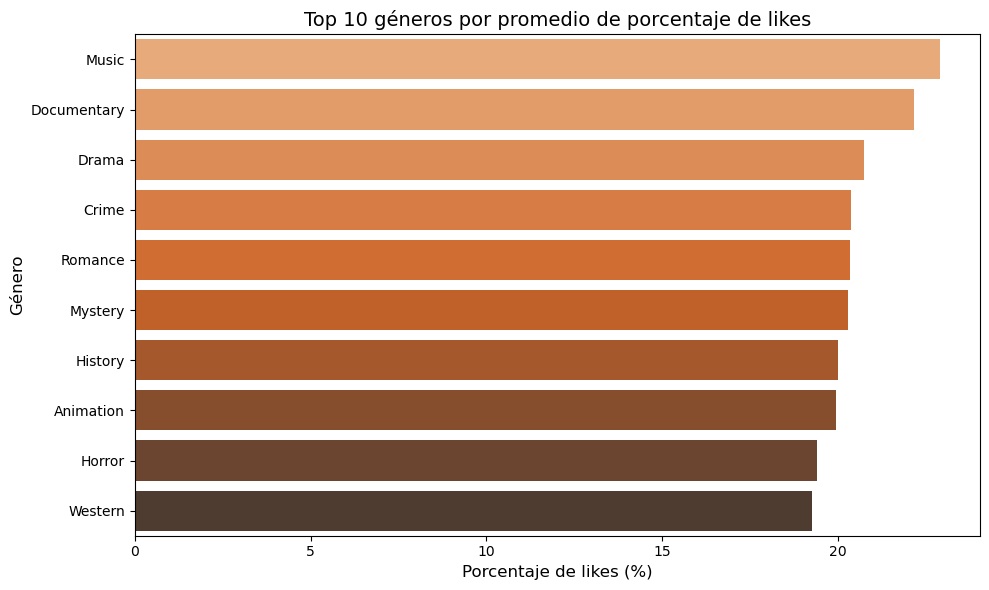

In [186]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_generos_likes,
    x='Porcentaje_likes',
    y='Genero',
    palette='Oranges_d'
)

plt.title('Top 10 géneros por promedio de porcentaje de likes', fontsize=14)
plt.xlabel('Porcentaje de likes (%)', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()
plt.show()

In [187]:
top_paises_likes = (
    df.groupby('Pais')['Porcentaje_likes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

C:\Users\natie\AppData\Local\Temp\ipykernel_11068\3783317882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


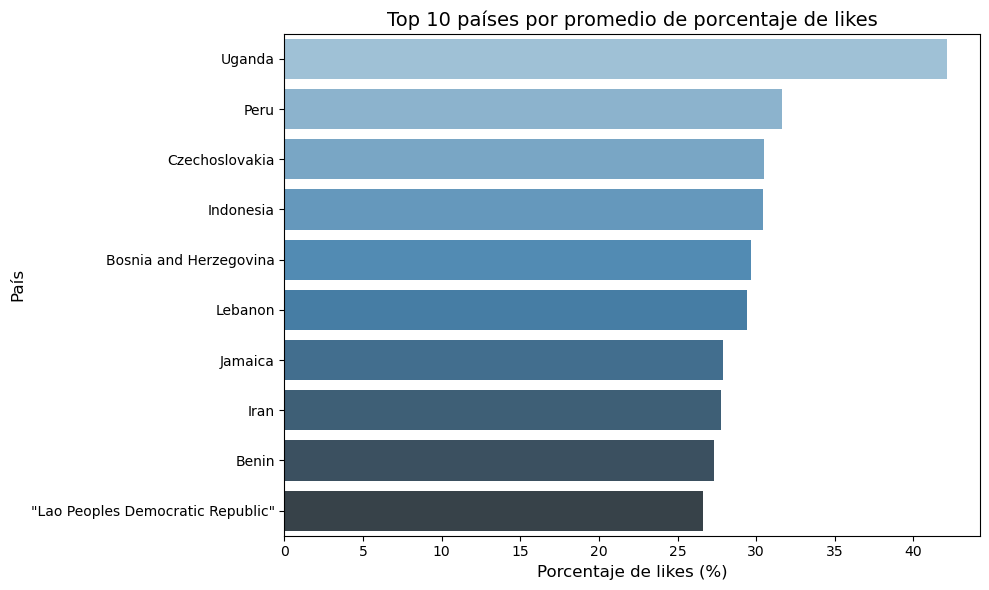

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_paises_likes,
    x='Porcentaje_likes',
    y='Pais',
    palette='Blues_d'
)

plt.title('Top 10 países por promedio de porcentaje de likes', fontsize=14)
plt.xlabel('Porcentaje de likes (%)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()

Los generos y paises también cambian el orden en el top 10 cuando analizamos el porcentaje de likes

**Objetivo específico 2:** determinar si existe relación, y cómo se comporta, entre vistas, duración y likes con la variable calificación_promedio.

In [78]:
df[["Vistas" , "Calificación_promedio"]] = df[["Vistas", "Calificación_promedio"]].astype(float)
df.dtypes

Titulo                    object
Director                  object
Calificación_promedio    float64
Genero                    object
Duración                 float64
Pais                      object
Lenguaje                  object
Descripcion               object
Productora                object
Vistas                   float64
Likes                      int64
Ratings                    int64
Enlace                    object
Protagonista              object
Coprotagonista            object
zscore                   float64
is_series                   bool
Porcentaje_likes         float64
dtype: object

In [79]:
correlation = df['Vistas'].corr(df["Calificación_promedio"])
print(correlation)

0.2538118151330212


In [81]:
correlation = df['Calificación_promedio'].corr(df["Duración"])
print(correlation)

0.16910007973098773


In [82]:
correlation = df['Calificación_promedio'].corr(df["Likes"])
print(correlation)

0.29537985624669966


Las variables Calificación promedio no tiene relación con la variable vistas, duración y likes.

In [83]:
correlation = df['Calificación_promedio'].corr(df["Porcentaje_likes"])
print(correlation)

0.7851062843174966


Visualizacion

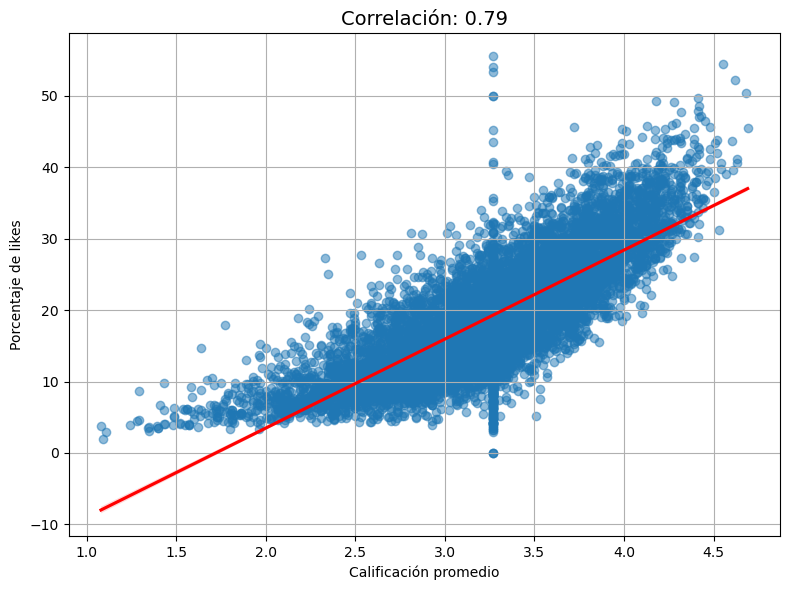

In [84]:
# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Gráfico de dispersión + línea de tendencia
sns.regplot(
    data=df,
    x='Calificación_promedio',
    y='Porcentaje_likes',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

# Título con valor de correlación
plt.title(f'Correlación: {correlation:.2f}', fontsize=14)
plt.xlabel('Calificación promedio')
plt.ylabel('Porcentaje de likes')
plt.grid(True)
plt.tight_layout()
plt.show()

Si bien existe una correlación alta entre las variables, observamos que los resultados del top 10 eran diferentes

**Escalado de variables**

Estandarización (Z-score): Calificación_promedio y Duración (variables con distribución normal)

In [83]:
#Importamos la libreria
from scipy.stats import zscore

In [84]:
#Aplicamos z-score
df['Calificación_promedio_zscore'] = zscore(df['Calificación_promedio'])

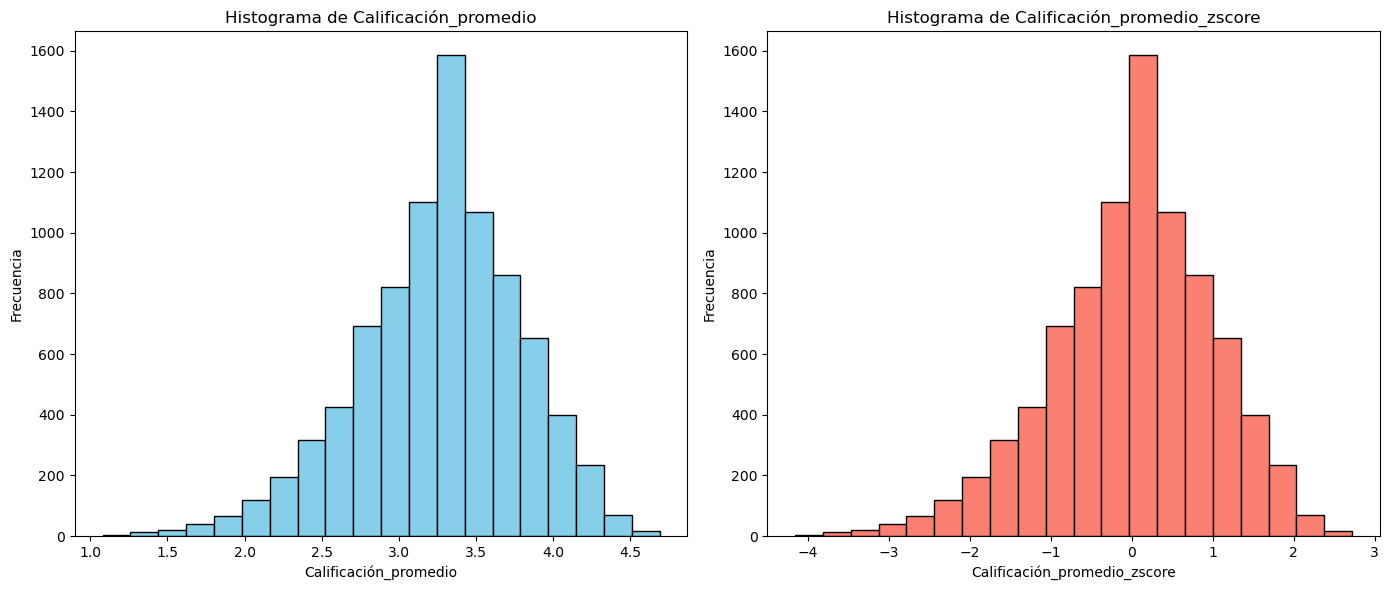

In [85]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Calificación_promedio'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Calificación_promedio')
axes[0].set_xlabel('Calificación_promedio')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Calificación_promedio_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Calificación_promedio_zscore')
axes[1].set_xlabel('Calificación_promedio_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Procedemos de la misma forma con la variable duración

In [86]:
#Aplicamos z-score
df['Duración_zscore'] = zscore(df['Duración'])

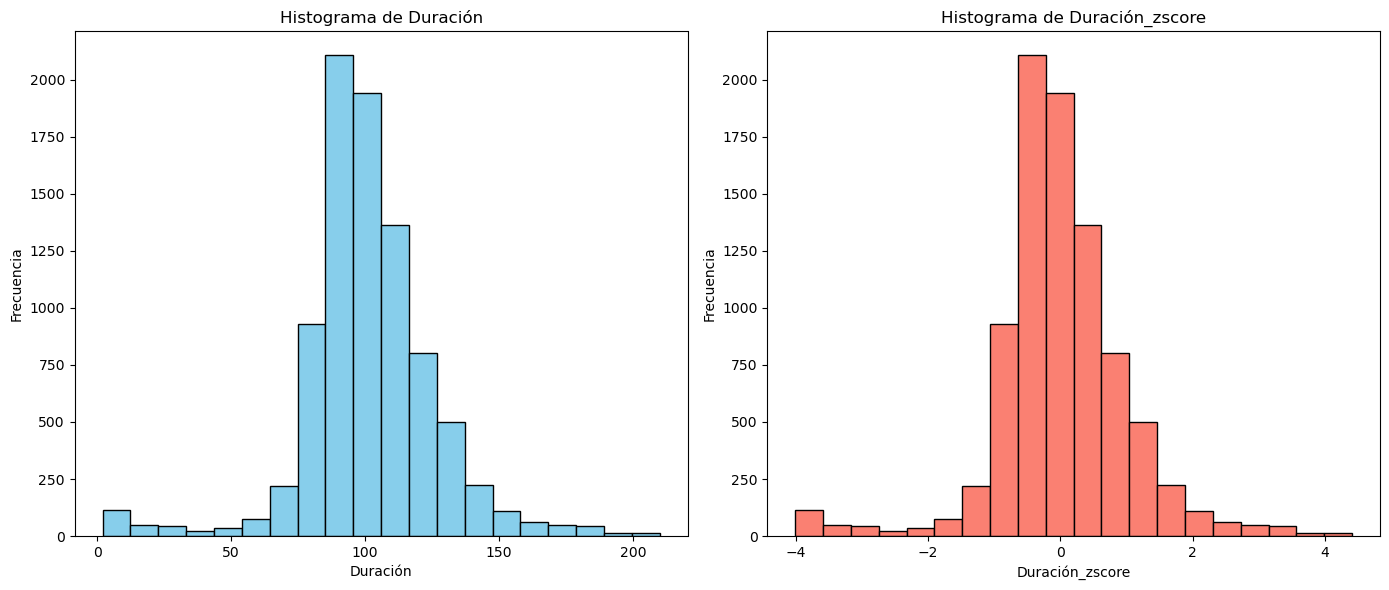

In [87]:
# Visualizamos: Histograma de la columna original y su z-score
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de la columna original
axes[0].hist(df['Duración'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma de Duración')
axes[0].set_xlabel('Duración')
axes[0].set_ylabel('Frecuencia')

# Histograma de las puntuaciones z
axes[1].hist(df['Duración_zscore'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Histograma de Duración_zscore')
axes[1].set_xlabel('Duración_zscore')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Normalización (Min-Max): Vistas, Likes, Ratings (variables con sesgo)

In [88]:
#Aplicamos la Normalización Min-Max
df['Vistas_normalizadas'] = (df['Vistas'] - df['Vistas'].min()) / (df['Vistas'].max() - df['Vistas'].min())

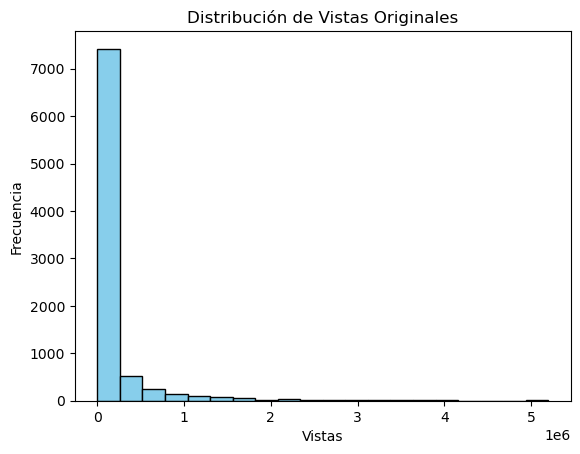

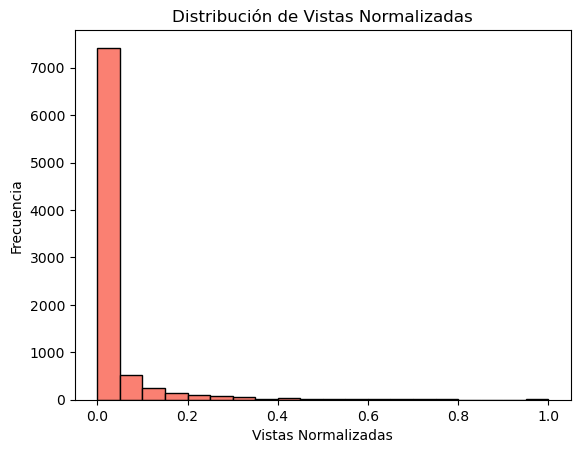

In [89]:
#Histograma de la columna original
plt.hist(df['Vistas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Vistas Originales')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Vistas_normalizadas'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Vistas Normalizadas')
plt.xlabel('Vistas Normalizadas')
plt.ylabel('Frecuencia')
plt.show()

Seguimos con la variable Likes

In [90]:
df['Likes_normalizados'] = (df['Likes'] - df['Likes'].min()) / (df['Likes'].max() - df['Likes'].min())

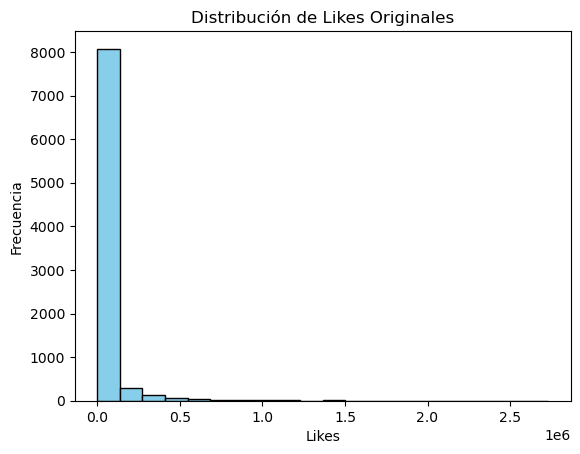

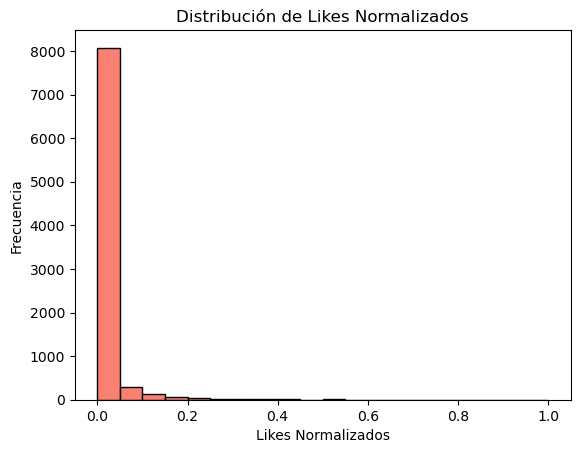

In [91]:
# Histograma de la columna original
plt.hist(df['Likes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Likes Originales')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Likes_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Likes Normalizados')
plt.xlabel('Likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [92]:
df['Ratings_normalizados'] = (df['Ratings'] - df['Ratings'].min()) / (df['Ratings'].max() - df['Ratings'].min())

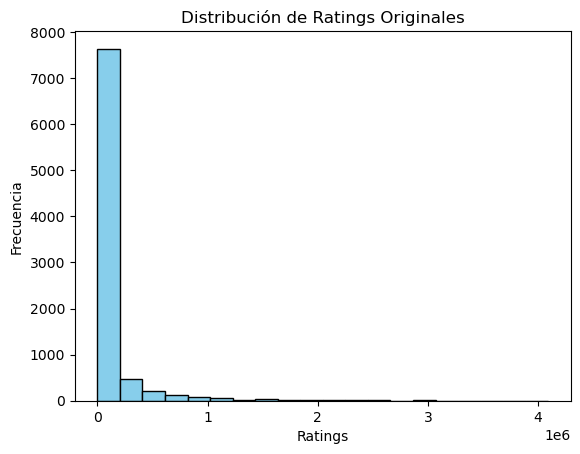

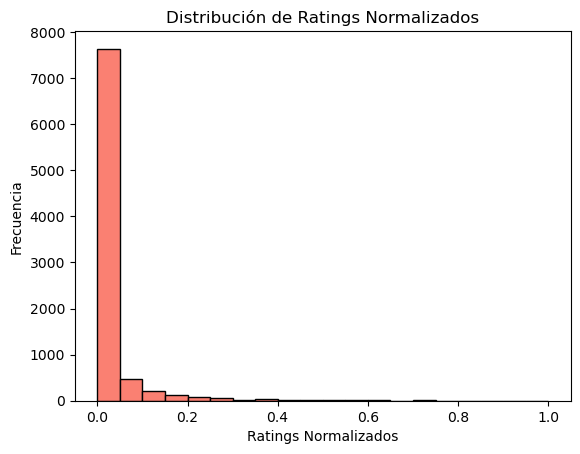

In [93]:
# Histograma de la columna original
plt.hist(df['Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings Originales')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la columna normalizada
plt.hist(df['Ratings_normalizados'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Ratings Normalizados')
plt.xlabel('Ratings Normalizados')
plt.ylabel('Frecuencia')
plt.show()

Debemos realizar el escalado de Porcentaje_likes, pero primero debemos saber que distribución tiene, para elegir el metodo mas adecuado

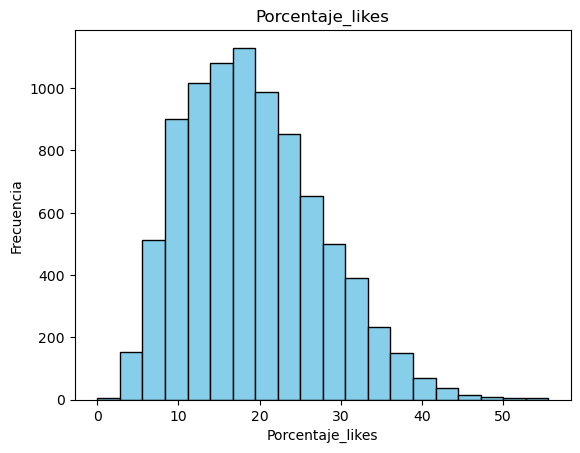

In [94]:
# Histograma de la columna original
plt.hist(df['Porcentaje_likes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Porcentaje_likes')
plt.xlabel('Porcentaje_likes')
plt.ylabel('Frecuencia')
plt.show()

Vemos que presenta una distribución sesgada a la izquierda, por lo tanto utilizaremos Normalización (min-max)

In [95]:
df['Porcentaje_likes_normalizado'] = (df['Porcentaje_likes'] - df['Porcentaje_likes'].min()) / (df['Porcentaje_likes'].max() - df['Porcentaje_likes'].min())

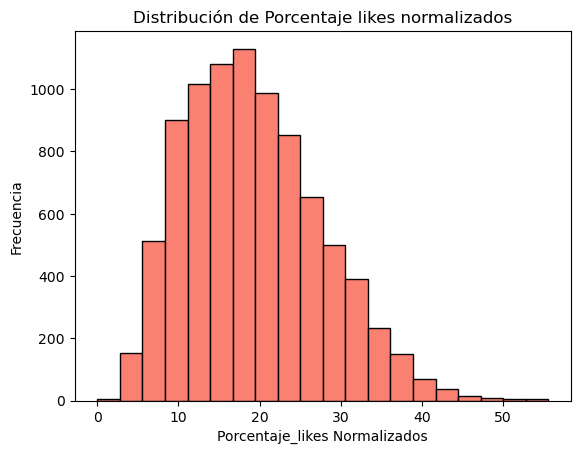

In [96]:
# Histograma de la columna normalizada
plt.hist(df['Porcentaje_likes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Porcentaje likes normalizados')
plt.xlabel('Porcentaje_likes Normalizados')
plt.ylabel('Frecuencia')
plt.show()

In [100]:
df.isnull().sum()

Titulo                          0
Director                        0
Calificación_promedio           0
Genero                          0
Duración                        0
Pais                            0
Lenguaje                        0
Descripcion                     0
Productora                      0
Vistas                          0
Likes                           0
Ratings                         0
Enlace                          0
Protagonista                    0
Coprotagonista                  0
zscore                          0
is_series                       0
Porcentaje_likes                0
Calificación_promedio_zscore    0
Duración_zscore                 0
Vistas_normalizadas             0
Likes_normalizados              0
Ratings_normalizados            0
Porcentaje_likes_normalizado    0
dtype: int64

In [101]:
df.to_csv('Movie_Data_File3.csv', index=False)